## Download data  

In [1]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/home/server-ailab-12gb/miniconda3/envs/Khoa_env/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /home/server-ailab-12gb/Khoa/AIO2023/hint/Final/sol/NonLinear_data.npy
100%|██████████████████████████████████████| 5.57k/5.57k [00:00<00:00, 2.16MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

## Load Data

In [3]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = torch.tensor(X, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

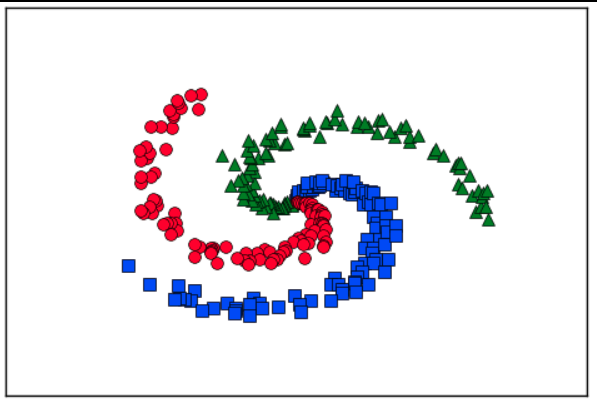

In [4]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        # print(idx)
        return self.X[idx], self.y[idx]

In [5]:
train_dataset = CustomDataset(X, labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

## Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib

### Softmax Regression

In [6]:
######################### YOUR CODE HERE #########################
# Thiết kế model theo yêu cầu đề  bài 
# Linear layer in_features = input_dims (2), out_features = num_classes (3)

class SoftMaxRegression(nn.Module):
    def __init__(self, input_dims, num_classes):

    def forward(self, x):
##################################################################

model = SoftMaxRegression(input_dims=2, num_classes=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [7]:
num_epochs = 200
train_losses = []
train_acc = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    accuracy = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    accuracy /= cnt
    train_acc.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {train_loss:.4f},  Train_Acc: {accuracy:.4f}")

Epoch 1/200, Train_Loss: 1.1106,  Train_Acc: 0.4467
Epoch 2/200, Train_Loss: 1.0762,  Train_Acc: 0.4633
Epoch 3/200, Train_Loss: 1.0331,  Train_Acc: 0.4667
Epoch 4/200, Train_Loss: 1.0022,  Train_Acc: 0.5333
Epoch 5/200, Train_Loss: 0.9762,  Train_Acc: 0.5667
Epoch 6/200, Train_Loss: 0.9578,  Train_Acc: 0.5700
Epoch 7/200, Train_Loss: 0.9458,  Train_Acc: 0.5400
Epoch 8/200, Train_Loss: 0.9235,  Train_Acc: 0.5333
Epoch 9/200, Train_Loss: 0.9158,  Train_Acc: 0.5267
Epoch 10/200, Train_Loss: 0.9020,  Train_Acc: 0.5200
Epoch 11/200, Train_Loss: 0.8903,  Train_Acc: 0.5267
Epoch 12/200, Train_Loss: 0.8763,  Train_Acc: 0.5200
Epoch 13/200, Train_Loss: 0.8696,  Train_Acc: 0.5100
Epoch 14/200, Train_Loss: 0.8693,  Train_Acc: 0.5233
Epoch 15/200, Train_Loss: 0.8601,  Train_Acc: 0.5333
Epoch 16/200, Train_Loss: 0.8523,  Train_Acc: 0.5300
Epoch 17/200, Train_Loss: 0.8413,  Train_Acc: 0.5433
Epoch 18/200, Train_Loss: 0.8375,  Train_Acc: 0.5300
Epoch 19/200, Train_Loss: 0.8423,  Train_Acc: 0.5400
Ep

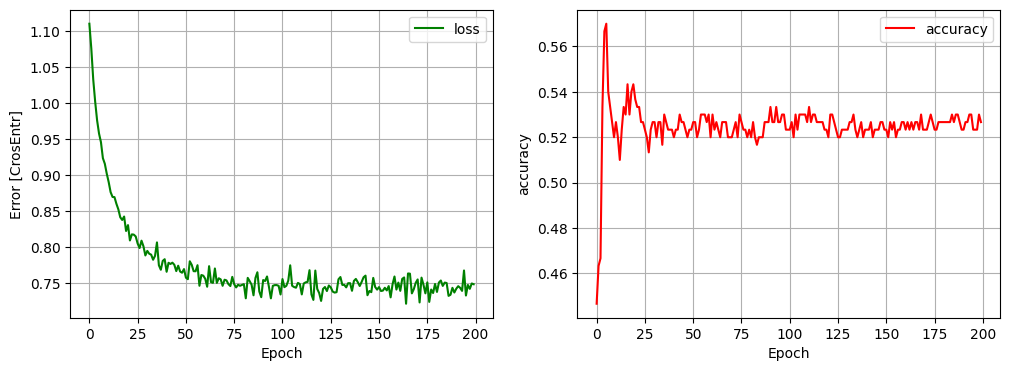

In [8]:

fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

